In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
bikes = pd.DataFrame()
for i in range(1, 4):
    bikes_temp = pd.read_csv(f"data/서울특별시 공공자전거 대여정보_201906_{i}.csv", encoding="cp949")
    bikes = pd.concat([bikes, bikes_temp]) # bikes 안에 bikes_temp 정보를 누적시킨다.

bikes

In [ ]:
# 정보 확인
bikes.info()

In [ ]:
# 비어있는 값이 있는지 확인
bikes.isnull().sum()

In [ ]:
# int 형식의 수치 데이터 기초 통계 확인
bikes.describe()

In [ ]:
# 대여일시의 타입을 변경
bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]')
bikes.info()

In [ ]:
# 대여일시 컬럼의 요일을 추출한다. 0 = 월요일 ~ 6 = 일요일
bikes['대여일시'].dt.dayofweek

### apply 함수 연습
- 사용 방법 : apply(사용자 정의 함수), apply(람다식)

In [ ]:
# apply란? 데이터프레임에 함수를 적용해주는 명령어
df = pd.DataFrame([[4,9], [1,4], [5,6]], columns=['A','B'])

def plus_one(x):
    x += 1
    return x

df['A'] = df['A'].apply(plus_one)

df

In [ ]:
# 람다 식 사용
df['B'] = df['B'].apply(lambda x : x+1)

df

- '요일' 파생변수 생성 (월, 화, 수, ..., 일)

In [ ]:
요일 = ['월', '화', '수', '목', '금', '토', '일']

In [ ]:
bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes['요일']

In [ ]:
bikes.head(3)

In [ ]:
bike_shop = pd.read_csv("data/공공자전거 대여소 정보_23_06.csv", encoding="cp949")

In [ ]:
bike_shop.head()

In [ ]:
bike_gu = bike_shop[['자치구', '대여소번호', '보관소(대여소)명', '위도', '경도']]

In [ ]:
# 보관소(대여소)명을 대여소명으로 변경
bike_gu = bike_gu.rename(columns={'보관소(대여소)명':'대여소명'})

In [ ]:
bike_gu.head(1)

In [ ]:
bikes.head(1)

In [ ]:
# bikes와 bike_gu의 대여 대여소번호와 대여소번호를 토대로 합침
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on = '대여소번호')

In [ ]:
bikes.head(2)

In [ ]:
# 대여소번호, 대여소명 열 삭제

bikes = bikes.drop(['대여소번호', '대여소명'], axis=1)

In [ ]:
bikes.head(1)

In [ ]:
bikes = bikes.rename(columns={'자치구':'대여구', '위도':'대여점 위도', '경도':'대여점 경도'})
bikes.head(1)

### 대여시간대별, 요일별 대연 건수 분석
- pivot_table 이용

In [ ]:
# 대여일시 컬럼의 시간 값을 가져와 대여시간대 컬럼에 삽입하여 생성
bikes['대여시간대'] = bikes['대여일시'].dt.hour

In [ ]:
# index = 행, columns = 열, values = 주제, aggfunc = 값의 평균
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc=['count'])

In [34]:
# matplotlib.pyplot을 이용하여 글꼴 삽입
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': '대여시간 * 요일 이용 건수'}, xlabel='대여시간대'>

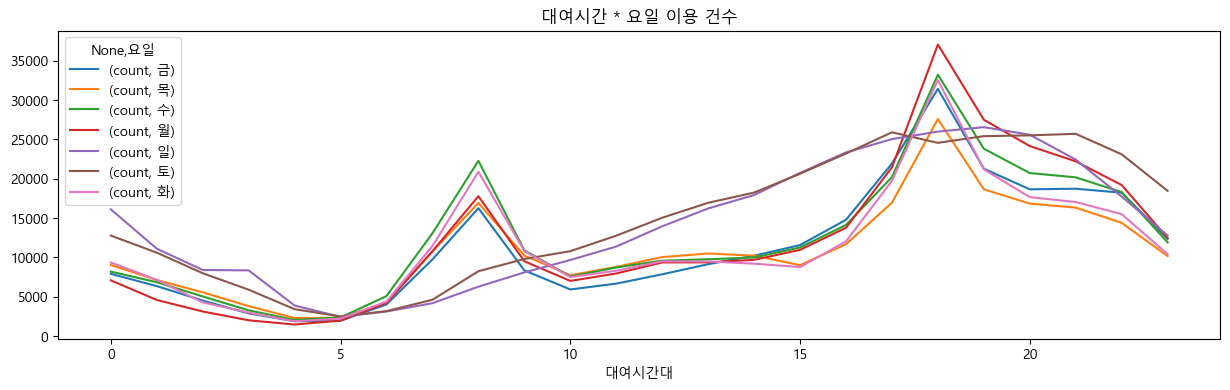

In [36]:
# kind = 그래프 종류, title = 타이틀, figsize = 그래프 크기
hourly_dayofweek_ride.plot(kind='line', title='대여시간 * 요일 이용 건수', figsize=(15,4))

<Axes: title={'center': '대여시간 * 요일 이용 건수'}, xlabel='대여시간대'>

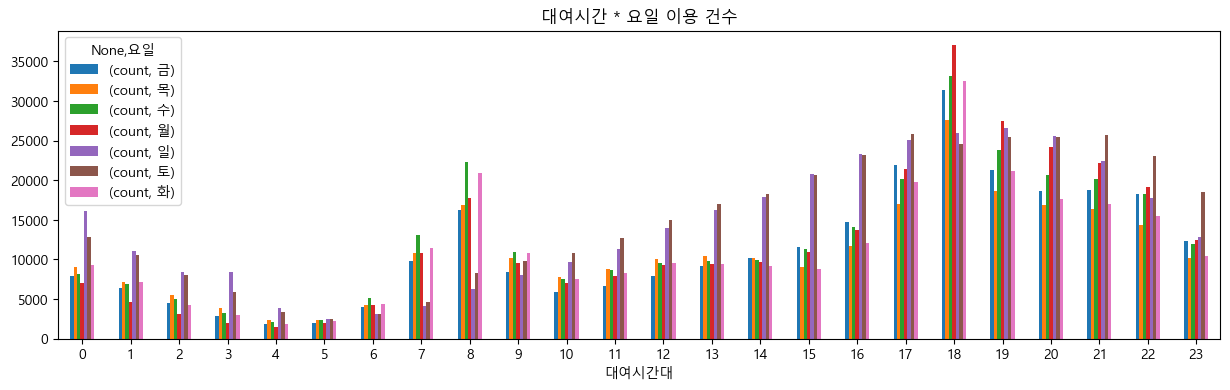

In [38]:
# kind를 bar 형태로 변경한 후 rot를 사용해 차트 가로열의 글씨를 정상적으로 만들어줌
hourly_dayofweek_ride.plot(kind='bar', title='대여시간 * 요일 이용 건수', figsize=(15,4), rot=0)

<Axes: xlabel='None-요일', ylabel='대여시간대'>

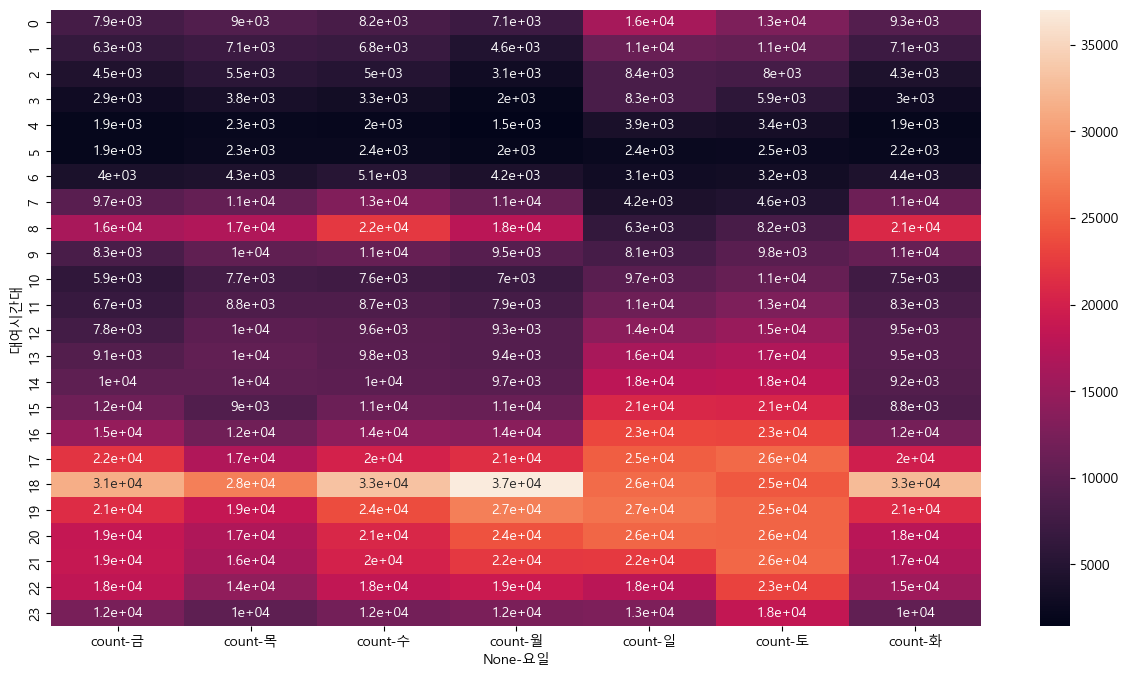

In [46]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True)

<Axes: xlabel='요일', ylabel='count'>

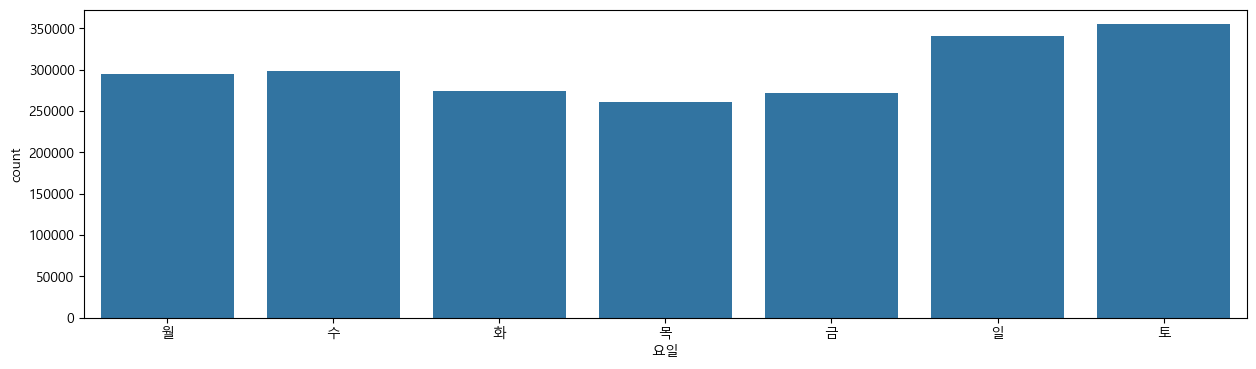

In [40]:
# 요일별 이용건수 분석

plt.figure(figsize = (15, 4))

sns.countplot(data=bikes, x='요일')

<Axes: xlabel='일자', ylabel='count'>

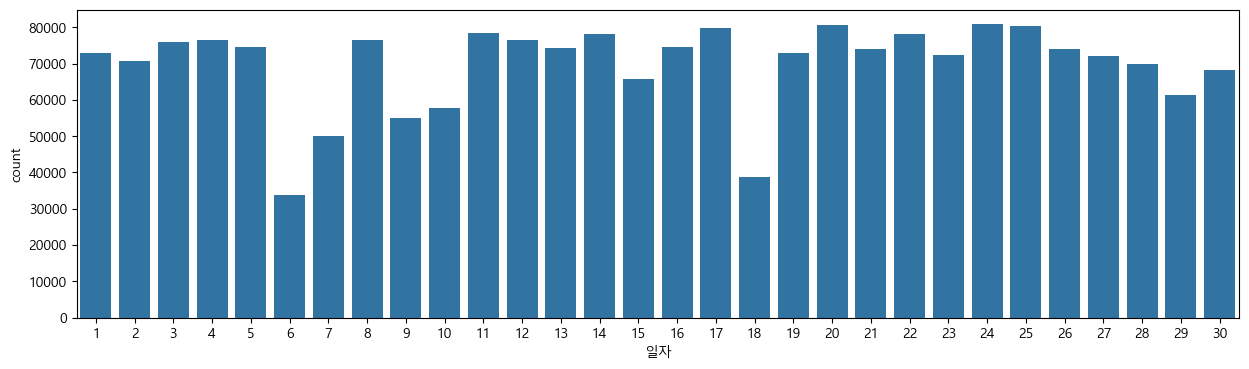

In [43]:
# 일자별로 이용수 분석

# 1단계 : '일자' 파생변수 생성
bikes['일자'] = bikes['대여일시'].dt.day

# 2단계 : 일자별 이용수 시각화
plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

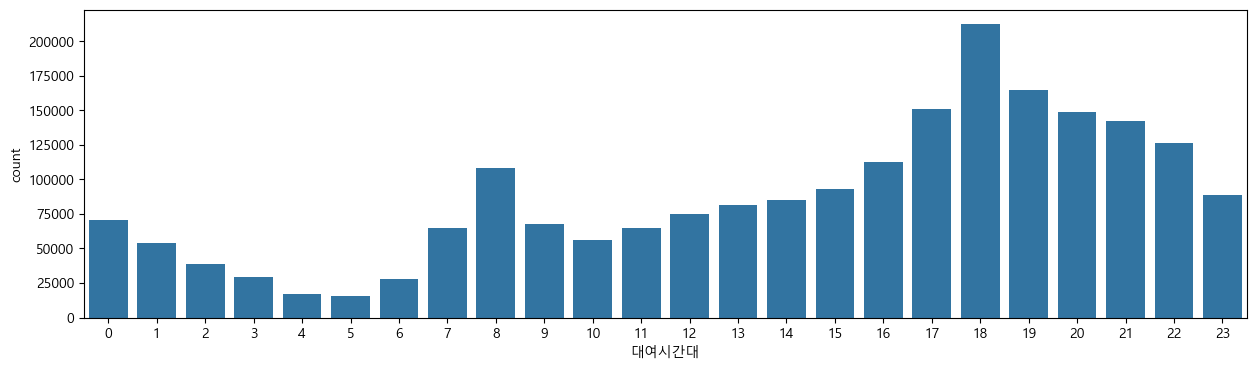

In [47]:
# 시간대 별 이용자 수 분석
plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='대여시간대')